In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [11]:
df = pd.read_csv('Opcode Data.csv')

In [12]:
df.head(5)

,Target,mov,ldr,add,bl,cmp,str,b,beq,bne,...,arm/1bfa5eb2964188c8b08c9bbde6f9b46f:,arm/1cdbfcabd817ed2a3f4f24291fbd6a43:,arm/1d9df1b4e6727c4c132935ff0057c10b:,arm/1e720d3707de8b67d0e888b4a1c3c37d:,arm/2083839a3f7a7f245291642f7c696f73:,arm/20da58b01a522c57354f7f95e3d974bf:,arm/215cc3334317cd22cade4e7a8f82a7dc:,arm/21c5d5b5e5e73e2f2eb88970628676ea:,arm/2475a6d15262f0b0bc247f6ee1f04799:,arm/249a05e6f3ec63f339708df5dcd37ee5:
0,0,217,187,34,82,32,10,11,12,20,...,0,0,0,0,0,0,0,0,0,0
1,0,272,356,121,165,115,66,48,37,43,...,0,0,0,0,0,0,0,0,0,0
2,0,91,105,75,80,57,17,11,11,17,...,0,0,0,0,0,0,0,0,0,0
3,0,605,654,578,228,247,251,100,135,82,...,0,0,0,0,0,0,0,0,0,0
4,0,1576,1637,1018,576,653,564,247,296,249,...,0,0,0,0,0,0,0,0,0,0


In [13]:
features = ['mov','ldr','add','bl','cmp','str','b','beq','bne','sub','ldrb','strb','bx','ldmfd','orr','rsb','stmfd','ldmia','subs','movne','moveq','and','cmn','ldrsh','tst','bls','adr','blt','ble','ldreq','bge','bgt','bhi','ldrne','eor','adds','bic','strne','stmia','svc','ldrh','movcc','adc','strh','blne','bcc','addne','stmea','streq','bleq','bcs','orrs','cmpeq','ands','addeq','movcs','movls','movs','ret','mul','subcs','movgt','rsbs','cmpne','movlt','movhi','movle','adrl','teq','mla','movge','orrcs','orrne','mvn','sbc','ldmeqfd','ldrls','addhi','orreq','bxne','rsbne','strneb','bxeq','addls','rsbmi','streqb','sbcs','adcs','strhi','teqne','cmpcc','subne','bpl','addcs','ldmdb','andne','stmdb','umull','andeq','subge','addcc','strcc','addgt','biceq','ldrsb','stmfa','stmib','addle','rsc','subeq','tstne','orrnes','stmgeia','strgtb','ldrlt','rsbhi','ldrgtb','strlt','orrgt','ldmib','addlt','ldrgt','smull','mvns','teqeq','strgeb','ldrge','addge','ldrgeb','ldrneb','ldreqb','blgt','andhi','ldc','mrc','streqh','mvnnes','ldmneia','import','ldmnefd','strls','movnes','ldmda','rsbeq','ldrhi','ldmgeia','ldmgedb','stmgedb','bics','bmi','rsblt','andnes','moveqs','subgt','cdp','ldrccb','ldmgtfd','subges','mlane','mlaeq','umlal','stmneia','strle','ldrle','strneh','strgt','rsbgts','swp','eoreq','rsbls','movmi','ldreqh','cmphi','ldmlefd','stmda','orreqs','strcs','strltb','ldmgefd','bxgt','rsbcs','ldrcc','subhi','andls','tsthi','submi','strge','cmpcs','bicne','cmpls','ldrneh','rsbge','rsble','strlsb','strleb','cdpge','ldmed','andle','subcc','orrle','eorne','ldrleb','ldrltb','orrge','strhib','bxls','blls','ldmhifd','bichi','mvneqs','rsbgt','andcs','subeqs','ldmccfd','ldmeqia','rscs','suble','mvncc','cmnmi','bxle','bxcs','bxcc','cmppl','cmpge','blhi','nop','movpl','orrhi','cmnne','bxhi','strmib','cdpmi','cdplt','ldrcs','strccb','mlale','bxge','mvnlt','andgt','subls','cmneq','biccc','sublt','blge','stc','ldrlsb','andcc','tsteq','cmplt','addmi','cmpgt','stmeqia','mcr','mrcge','mrclt','ldclt','rsbcc','ldmltfd','cmple','blle','andge','stmltia','muls','orrls','bicnes','orrlt','mvnmi','bllt','ldmleia','strcsb','blcc','orrcc','orrpl','eorgt','und','andlt','ldrnesh','ldreqsb','mvnne','ldmnedb','bxlt','subcss','ldmlsfd','muleq','ldmltia','mlacc','blcs','stmlsia','orrmi','mullt','addpl','ldrpl','strpl','rsbcss','umullhi','bicgt','subpls','stmccia','stmneea','ldrnesb','smlal','stmeqea','ldmccia','ldreqsh','ldmeqib','stmneib','bicge','mvngt','swphi','ldrhib','mulls','stmhiia','stmnedb','umulleq','stcl','ldmneda','mvnge','strmi','ldrcsb','stmeqib','mvnle','ldmgtia','strgth','adrne','strlth','mvneq','strgeh','strleh','strcch','eorle','ldrlssb','ldmneib','mulge','mlalt','mulne','eors','stmgeea','ldmplia','strhih','strlsh','stmhiib','stmlsib','smullne','smulleq','strcsh','smullge','bicls','ldmcsda','stmltea','ldrgth','eorge','stmgtia','umullge','mlage','umulllt','smullgt','mulcs','ldmcsfd','mulle']
x = df.loc[:, features].values

In [14]:
y = df.loc[:,['Target']].values

In [15]:
x_scaled = StandardScaler().fit_transform(x)

In [16]:
pd.DataFrame(data = x_scaled, columns = features)

,mov,ldr,add,bl,cmp,str,b,beq,bne,sub,...,ldrgth,eorge,stmgtia,umullge,mlage,umulllt,smullgt,mulcs,ldmcsfd,mulle
0,-0.708937,-0.621752,-0.614896,-0.517633,-0.597051,-0.740469,-0.698637,-0.550874,-0.533046,-0.733436,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622
1,-0.694430,-0.576221,-0.566051,-0.474475,-0.544492,-0.696266,-0.640846,-0.515742,-0.498010,-0.707658,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622
2,-0.742170,-0.643844,-0.591877,-0.518673,-0.581220,-0.734944,-0.698637,-0.552279,-0.537615,-0.731288,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622
3,-0.606600,-0.495935,-0.309477,-0.441717,-0.460904,-0.550239,-0.559626,-0.378027,-0.438603,-0.651804,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622
4,-0.350494,-0.231099,-0.062447,-0.260767,-0.203808,-0.303177,-0.330025,-0.151781,-0.184217,-0.550839,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622
5,-0.709728,-0.609359,-0.576719,-0.479675,-0.590086,-0.733365,-0.689265,-0.532605,-0.537615,-0.729140,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622
6,-0.747445,-0.640342,-0.609843,-0.530112,-0.602751,-0.727840,-0.681456,-0.557900,-0.549801,-0.735584,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622
7,-0.279280,-0.196613,0.426560,0.391276,-0.168346,-0.260553,-0.125414,-0.067466,-0.225345,-0.048158,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622
8,-0.760633,-0.665397,-0.627248,-0.555591,-0.610349,-0.745994,-0.712694,-0.563521,-0.555895,-0.737733,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622
9,-0.763006,-0.665667,-0.628932,-0.557671,-0.614149,-0.745994,-0.714256,-0.564926,-0.561988,-0.742029,...,-0.044237,-0.062622,-0.062622,-0.044237,-0.044237,-0.044237,-0.044237,-0.062622,-0.062622,-0.062622


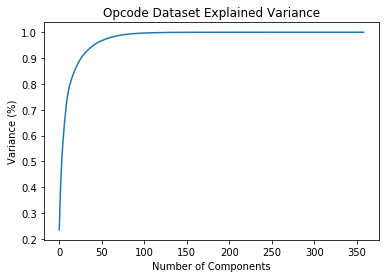

In [17]:
pca = PCA().fit(x_scaled)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Opcode Dataset Explained Variance')
plt.show()

In [61]:
pca = PCA(n_components=25)

In [62]:
x_reduced = pca.fit_transform(x_scaled)

In [63]:
principalDf = pd.DataFrame(data = x_reduced
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8','principal component 9', 'principal component 10','principal component 11', 'principal component 12','principal component 13', 'principal component 14','principal component 15', 'principal component 16','principal component 17', 'principal component 18','principal component 19', 'principal component 20','principal component 21', 'principal component 22','principal component 23', 'principal component 24','principal component 25'])

In [64]:
principalDf.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25
0,-8.904618,2.940661,-0.424275,0.597197,0.462773,-0.672851,-0.336404,0.121196,-0.194538,-0.488239,...,0.274592,-0.030443,-0.132294,0.106129,-0.312269,0.167121,-0.123116,-0.017366,-0.120379,-0.175071
1,-8.545387,3.423637,-0.455241,0.666249,0.381832,-0.524436,-0.224213,0.281173,-0.313737,-0.479452,...,0.272456,0.344584,0.202598,-0.064525,-0.547325,0.151122,-0.281821,-0.215583,0.130813,-0.159504
2,-8.435471,2.640093,-0.246151,0.412188,0.397637,-0.735902,-0.295091,0.136860,-0.100606,-0.345864,...,0.177523,-0.132477,0.082714,0.075530,-0.200283,0.060492,-0.027758,-0.016902,-0.092608,-0.284432
3,-7.140209,3.226934,-0.462053,0.292534,1.365807,-0.683722,-0.507040,0.100923,-0.520253,-0.387577,...,-0.336239,-0.230729,0.669119,0.209881,-0.584042,0.391241,-0.073810,0.037790,-0.297924,-0.319943
4,-2.776208,2.921410,-2.886036,0.216005,0.494139,-0.573166,-0.964878,-0.241765,-0.603534,2.051079,...,-0.527310,0.423209,1.888652,-0.579304,-1.069257,0.086978,-0.895823,0.062927,-0.329629,-0.441105


In [51]:
df[['Target']].head()

,Target
0,0
1,0
2,0
3,0
4,0


In [65]:
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)
finalDf.to_csv("Opcode Dataset25.csv", sep=',', encoding='utf-8')
finalDf.head(512)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,Target
0,-8.904618,2.940661,-0.424275,0.597197,0.462773,-0.672851,-0.336404,0.121196,-0.194538,-0.488239,...,-0.030443,-0.132294,0.106129,-0.312269,0.167121,-0.123116,-0.017366,-0.120379,-0.175071,0
1,-8.545387,3.423637,-0.455241,0.666249,0.381832,-0.524436,-0.224213,0.281173,-0.313737,-0.479452,...,0.344584,0.202598,-0.064525,-0.547325,0.151122,-0.281821,-0.215583,0.130813,-0.159504,0
2,-8.435471,2.640093,-0.246151,0.412188,0.397637,-0.735902,-0.295091,0.136860,-0.100606,-0.345864,...,-0.132477,0.082714,0.075530,-0.200283,0.060492,-0.027758,-0.016902,-0.092608,-0.284432,0
3,-7.140209,3.226934,-0.462053,0.292534,1.365807,-0.683722,-0.507040,0.100923,-0.520253,-0.387577,...,-0.230729,0.669119,0.209881,-0.584042,0.391241,-0.073810,0.037790,-0.297924,-0.319943,0
4,-2.776208,2.921410,-2.886036,0.216005,0.494139,-0.573166,-0.964878,-0.241765,-0.603534,2.051079,...,0.423209,1.888652,-0.579304,-1.069257,0.086978,-0.895823,0.062927,-0.329629,-0.441105,0
5,-8.854763,3.030803,-0.436095,0.613018,0.449475,-0.575727,-0.285726,0.118399,-0.184664,-0.409728,...,0.054519,-0.091351,0.136401,-0.273816,0.173465,-0.107916,-0.049286,-0.082028,-0.103375,0
6,-8.880772,2.964606,-0.419388,0.627577,0.468639,-0.706332,-0.383260,0.151198,-0.180202,-0.480380,...,-0.037442,-0.126009,0.111963,-0.313289,0.149439,-0.112973,-0.008169,-0.125944,-0.178058,0
7,-6.915970,3.886635,-0.066811,1.041064,0.544502,0.214740,0.178135,-0.225300,-0.388076,-0.433243,...,0.465434,0.009566,0.030640,-0.039535,0.013972,-0.148980,0.094504,-0.122565,-0.266427,0
8,-8.967502,2.753810,-0.277716,0.594153,0.417582,-0.703088,-0.413175,0.002532,-0.119142,-0.462155,...,-0.267044,-0.348840,0.157837,-0.153327,0.148575,0.095037,0.021169,-0.017913,-0.165104,0
9,-8.968481,2.750719,-0.277326,0.594266,0.418590,-0.706942,-0.414928,0.001624,-0.118269,-0.462882,...,-0.269041,-0.350139,0.157351,-0.153765,0.148252,0.094990,0.023609,-0.019426,-0.168131,0
